# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis

1. Cities in -20 latitude shows the greatest max temperature.

2. The humidity seems to be level between -40 to 60 latitude which is suprising to see plus Northern Hemisphere also has more humidity than the Southern Hemisphere.

3. Wind speed is suprisingly higher in the Northern Hemisphere compare to the Southern Hemisphere which I hear alot of cities in the South nick named the "Windy City"

In [55]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
lats

array([-48.24229556, -70.70969935, -20.33621049, ..., -89.89711289,
        72.98246199, -54.76497119])

In [4]:
lngs

array([-119.32745787,  -63.58372057,    8.65828729, ...,  114.62560853,
        -41.15642184,  -51.25740146])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url+ "appid=" + weather_api_key+"&q="

In [16]:
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -124.2243,
        "lat": 43.4065
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 277.96,
        "feels_like": 273.74,
        "temp_min": 274.95,
        "temp_max": 279.1,
        "pressure": 1020,
        "humidity": 74
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.17,
        "deg": 30
    },
    "clouds": {
        "all": 0
    },
    "dt": 1645582615,
    "sys": {
        "type": 1,
        "id": 5239,
        "country": "US",
        "sunrise": 1645542275,
        "sunset": 1645581390
    },
    "timezone": -28800,
    "id": 5742974,
    "name": "North Bend",
    "cod": 200
}


In [17]:
city_name = []
country = []
date = []
lat=[]
lon=[]
max_temp=[]
humidity = []
clouds = []
wind_speed = []

counter = 1

In [8]:
#response=requests.get(url+ "appid=" + weather_api_key+"&q="+cities[0]).json()

#response

In [19]:
print(f"Executing Data Retrieval")
print(f"--------------------------------------")

for city in cities:

    try:
        response=requests.get(query_url + city + "&units=imperial").json()
        city_name.append(response["name"])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response['sys']["country"])
        date.append(response['dt'])
        print(f"Returned City {counter}: {response['name']}.")
        counter += 1
    except:
        print('city not found...')
print(f"---------------------------------------------")
print(f"Execution Data Complete")
print(f"---------------------------------------------")


Executing Data Retrieval
--------------------------------------
Returned City 1: Lavrentiya.
Returned City 2: Hilo.
city not found...
Returned City 3: Jamestown.
Returned City 4: Port Hedland.
Returned City 5: Hermanus.
Returned City 6: Fortuna.
Returned City 7: Lakatoro.
Returned City 8: Saint-Philippe.
Returned City 9: Khāsh.
Returned City 10: Karratha.
Returned City 11: Rikitea.
Returned City 12: Zhigansk.
Returned City 13: Punta Alta.
Returned City 14: San Luis.
Returned City 15: Formosa do Rio Preto.
Returned City 16: Kyaikto.
Returned City 17: Newburn.
city not found...
Returned City 18: Busselton.
Returned City 19: Makakilo City.
Returned City 20: Atyrau.
Returned City 21: Albany.
city not found...
Returned City 22: Castro.
Returned City 23: Montes Claros.
Returned City 24: Saint-Pierre.
Returned City 25: Yellowknife.
Returned City 26: Leningradskiy.
Returned City 27: Mataura.
Returned City 28: Padang.
Returned City 29: Bredasdorp.
Returned City 30: Ushuaia.
Returned City 31: Pu

Returned City 263: Marzuq.
Returned City 264: Lamu.
Returned City 265: Hibbing.
Returned City 266: Flinders.
Returned City 267: Griffith.
Returned City 268: Roald.
Returned City 269: College.
city not found...
Returned City 270: Okara.
Returned City 271: Kalabo.
Returned City 272: Derzhavīnsk.
Returned City 273: Umluj.
Returned City 274: Kieta.
Returned City 275: Zonguldak.
Returned City 276: Erenhot.
Returned City 277: Mahébourg.
Returned City 278: Faanui.
Returned City 279: Airai.
Returned City 280: Atasū.
city not found...
city not found...
Returned City 281: Yumen.
city not found...
Returned City 282: Ilulissat.
Returned City 283: São Filipe.
Returned City 284: Choya.
Returned City 285: Hanko.
Returned City 286: Laguna.
Returned City 287: Burnie.
Returned City 288: Chapais.
Returned City 289: La Ronge.
Returned City 290: Cayenne.
Returned City 291: Ţahţā.
Returned City 292: Hodkovice nad Mohelkou.
Returned City 293: Slave Lake.
Returned City 294: Zakamensk.
Returned City 295: San M

Returned City 519: Naryan-Mar.
Returned City 520: Bonavista.
Returned City 521: Manzhouli.
Returned City 522: Guanambi.
Returned City 523: Pandan.
Returned City 524: Okitipupa.
Returned City 525: Tacoronte.
Returned City 526: Tezu.
Returned City 527: Kongolo.
Returned City 528: Caravelas.
Returned City 529: Berlevåg.
Returned City 530: Mahon.
Returned City 531: Zinder.
Returned City 532: Gainesville.
Returned City 533: Green River.
Returned City 534: Ribeira Brava.
city not found...
Returned City 535: Ofakim.
Returned City 536: Cumbernauld.
Returned City 537: Huanren.
Returned City 538: Emet.
Returned City 539: St. George's.
Returned City 540: Matara.
Returned City 541: Porto-Novo.
Returned City 542: Ondjiva.
Returned City 543: Belsand.
Returned City 544: Hudiksvall.
Returned City 545: Severodvinsk.
Returned City 546: Almaznyy.
city not found...
Returned City 547: Canutama.
---------------------------------------------
Execution Data Complete
-------------------------------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
weather_dataframe = {
    'City':city_name, 
    'Lat': lat,
    'Lng': lon, 
    'Max Temp':max_temp, 
    'Humidity':humidity, 
    'Cloudiness':clouds,
    'Wind Speed':wind_speed, 
    'Country':country, 
    'Date':date
}

In [35]:
weather_df=pd.DataFrame(weather_dataframe)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lavrentiya,65.5833,-171.0000,7.30,96,100,8.95,RU,1645582506
1,Hilo,19.7297,-155.0900,75.25,81,100,1.01,US,1645582502
2,Jamestown,42.0970,-79.2353,56.30,72,100,11.50,US,1645582522
3,Port Hedland,-20.3167,118.5667,95.05,59,100,12.66,AU,1645582544
4,Hermanus,-34.4187,19.2345,62.80,73,0,3.71,ZA,1645582496


In [25]:
len(cities), len(lat), len(lon), len(max_temp), len(humidity), len(clouds), len(wind_speed), len(country)


(611, 547, 547, 547, 547, 547, 547, 547)

In [36]:
weather_df.to_csv("WeatherPyData.csv", encoding = "utf-8", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
#  Get the indices of cities that have humidity over 100%.
Humidity_df = weather_df["Humidity"]
Humidity_df

0      96
1      81
2      72
3      59
4      73
       ..
542    58
543    91
544    95
545    85
546    99
Name: Humidity, Length: 547, dtype: int64

In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
quartiles = Humidity_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")
print(f"The the median of Humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Humidity is: 66.0
The upper quartile of Humidity is: 90.0
The interquartile range of Humidity is: 24.0
The the median of Humidity is: 79.0 
Values below 30.0 could be outliers.
Values above 126.0 could be outliers.


In [42]:
clean_data_df = weather_df.drop(weather_df[weather_df['Humidity'] < 15].index, inplace = False)
clean_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lavrentiya,65.5833,-171.0000,7.30,96,100,8,RU,1645582506
1,Hilo,19.7297,-155.0900,75.25,81,100,1,US,1645582502
2,Jamestown,42.0970,-79.2353,56.30,72,100,11,US,1645582522
3,Port Hedland,-20.3167,118.5667,95.05,59,100,12,AU,1645582544
4,Hermanus,-34.4187,19.2345,62.80,73,0,3,ZA,1645582496
...,...,...,...,...,...,...,...,...,...
542,Belsand,26.4500,85.4000,59.45,58,1,5,IN,1645582809
543,Hudiksvall,61.7290,17.1036,19.11,91,100,5,SE,1645582811
544,Severodvinsk,64.5635,39.8302,14.11,95,100,5,RU,1645582811
545,Almaznyy,48.0448,40.0450,42.94,85,100,7,RU,1645582811


In [45]:
clean_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,18.885414,21.217913,51.723019,75.211111,58.853704,7.337037,1.645583e+09
std,33.532043,90.452229,29.469592,18.935489,40.704634,6.033097,1.059666e+02
min,-54.800000,-175.200000,-31.490000,15.000000,0.000000,0.000000,1.645582e+09
25%,-9.325025,-60.120825,31.087500,66.000000,16.750000,3.000000,1.645583e+09
50%,21.443950,24.709550,61.250000,79.000000,75.000000,6.000000,1.645583e+09
75%,47.679950,102.632600,75.387500,90.000000,100.000000,10.000000,1.645583e+09
max,78.218600,179.316700,95.050000,100.000000,100.000000,51.000000,1.645583e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

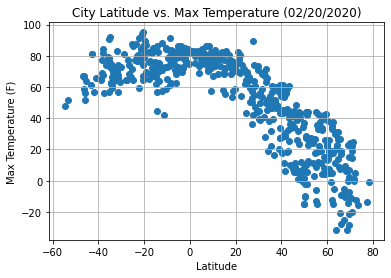

In [47]:
 # Build a scatter plot for each data type
plt.scatter(clean_data_df["Lat"], clean_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (02/20/2022)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('MaxTempPerLat.png')

# Show plot
plt.show()

## Latitude vs. Humidity Plot

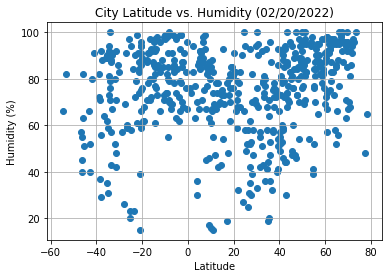

In [48]:
 # Build a scatter plot for each data type
plt.scatter(clean_data_df["Lat"], clean_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (02/20/2022)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('HumidityPerLat.png')

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
 # Build a scatter plot for each data type
plt.scatter(clean_data_df["Lat"], clean_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (02/20/2022)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('CloudinessPerLat.png')

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

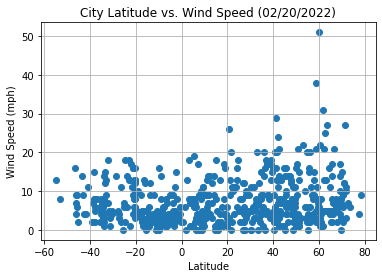

In [49]:
 # Build a scatter plot for each data type
plt.scatter(clean_data_df["Lat"], clean_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (02/20/2022)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('WindSpeedPerLat.png')

# Show plot
plt.show()

## Linear Regression

In [50]:
#Seperate plots into northern hemisphere (greater than or equal to 0 degrees latitdue) and Southern hemisphere (less than 0 degrees latitude)
southern_df = clean_data_df.drop(clean_data_df[clean_data_df['Lat'] >= 0].index, inplace = False)
southern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Port Hedland,-20.3167,118.5667,95.05,59,100,12,AU,1645582544
4,Hermanus,-34.4187,19.2345,62.80,73,0,3,ZA,1645582496
6,Lakatoro,-16.0999,167.4164,85.01,72,17,12,VU,1645582632
7,Saint-Philippe,-21.3585,55.7679,78.35,87,100,16,RE,1645582498
9,Karratha,-20.7377,116.8463,94.10,39,99,9,AU,1645582633
...,...,...,...,...,...,...,...,...,...
521,Guanambi,-14.2233,-42.7814,71.22,77,39,4,BR,1645582800
526,Kongolo,-5.3833,27.0000,69.84,97,100,2,CD,1645582803
527,Caravelas,-17.7125,-39.2481,75.99,87,0,4,BR,1645582564
541,Ondjiva,-17.0667,15.7333,67.17,91,96,3,AO,1645582809


In [51]:
southern_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,1.820000e+02
mean,-20.682989,34.908831,73.609945,76.384615,57.978022,6.104396,1.645583e+09
std,13.032648,93.045353,9.810653,18.406262,40.452954,4.450474,1.126870e+02
min,-54.800000,-175.200000,41.810000,15.000000,0.000000,0.000000,1.645582e+09
25%,-32.767525,-52.179450,66.740000,67.000000,17.000000,3.000000,1.645583e+09
50%,-20.107100,25.150750,74.110000,80.500000,70.500000,5.000000,1.645583e+09
75%,-9.105650,135.083300,80.980000,91.000000,100.000000,8.750000,1.645583e+09
max,-0.413900,178.300000,95.050000,100.000000,100.000000,18.000000,1.645583e+09


In [52]:
northern_df = clean_data_df.drop(clean_data_df[clean_data_df['Lat'] < 0].index, inplace = False)
northern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lavrentiya,65.5833,-171.0000,7.30,96,100,8,RU,1645582506
1,Hilo,19.7297,-155.0900,75.25,81,100,1,US,1645582502
2,Jamestown,42.0970,-79.2353,56.30,72,100,11,US,1645582522
5,Fortuna,40.5982,-124.1573,44.65,73,0,9,US,1645582546
8,Khāsh,28.2211,61.2158,47.30,47,7,3,IR,1645582633
...,...,...,...,...,...,...,...,...,...
540,Porto-Novo,6.4965,2.6036,79.00,87,9,6,BJ,1645582808
542,Belsand,26.4500,85.4000,59.45,58,1,5,IN,1645582809
543,Hudiksvall,61.7290,17.1036,19.11,91,100,5,SE,1645582811
544,Severodvinsk,64.5635,39.8302,14.11,95,100,5,RU,1645582811


In [53]:
northern_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,3.580000e+02
mean,39.001194,14.257726,40.596145,74.614525,59.298883,7.963687,1.645583e+09
std,20.187845,88.425885,29.900364,19.196814,40.881225,6.613908,1.010810e+02
min,0.700000,-173.300000,-31.490000,15.000000,0.000000,0.000000,1.645582e+09
25%,21.927825,-69.170250,17.560000,66.000000,15.250000,3.000000,1.645583e+09
50%,40.836350,24.175350,43.240000,78.000000,75.000000,6.000000,1.645583e+09
75%,55.802975,89.159275,69.112500,90.000000,100.000000,11.000000,1.645583e+09
max,78.218600,179.316700,89.580000,100.000000,100.000000,51.000000,1.645583e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      155.08558
1      109.23198
2      131.59928
5      130.10048
8      117.72338
         ...    
540     95.99878
542    115.95228
543    151.23128
544    154.06578
545    137.54708
Name: Lat, Length: 358, dtype: float64
y = -1.29x +90.79


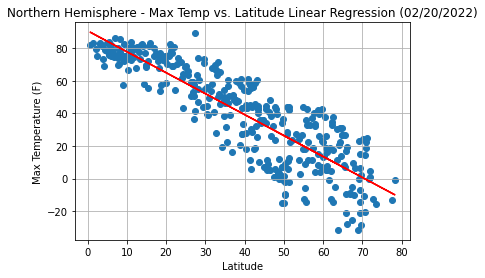

The r-value is -0.8689195904751436.


In [57]:
 # Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (02/20/2022)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Max Temp"])

#LinReg and plot line 
test1_df = northern_df["Lat"]
test2_df = northern_df["Max Temp"]

model = st.linregress(test1_df,test2_df)
y_values = test1_df*model[0]+model[1]
plt.plot(test1_df, y_values, color ='r')

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Save the figure
plt.savefig('NorthernMaxTempPerLat.png')

#show figure
plt.show()

#Determine R Value 
print(f"The r-value is {rvalue}.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

3      59.069896
4      44.967896
6      63.286696
7      58.028096
9      58.648896
         ...    
521    65.163296
526    74.003296
527    61.674096
541    62.319896
546    72.852696
Name: Lat, Length: 182, dtype: float64
y = 0.27x +79.12


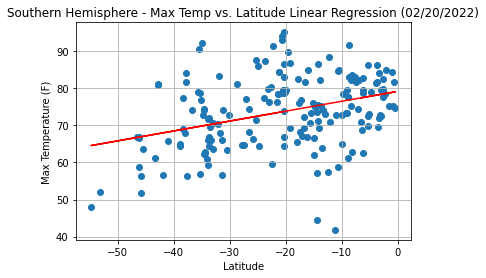

The r-value is 0.3539091023951405.


In [64]:
 # Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (02/20/2022)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Max Temp"])

#LinReg and plot line 
test3_df = southern_df["Lat"]
test4_df = southern_df["Max Temp"]

model = st.linregress(test3_df,test4_df)
y_values = test3_df*model[0]+model[1]
plt.plot(test3_df, y_values, color ='r')

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Save the figure
plt.savefig('SouthernMaxTempPerLat.png')

# Show plot
plt.show()

#Determine R Value 
print(f"The r-value is {rvalue}.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      129.560185
1       83.706585
2      106.073885
5      104.575085
8       92.197985
          ...    
540     70.473385
542     90.426885
543    125.705885
544    128.540385
545    112.021685
Name: Lat, Length: 358, dtype: float64
y = 0.28x +63.7
The r-value is 0.29438037488825886.


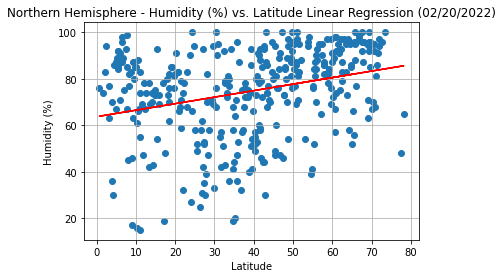

In [63]:
 # Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (02/20/2022)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Humidity"])

#LinReg and plot line 
test5_df = northern_df["Lat"]
test6_df = northern_df["Humidity"]

model = st.linregress(test5_df,test6_df)
y_values = test5_df*model[0]+model[1]
plt.plot(test1_df, y_values, color ='r')

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#Determine R Value 
print(f"The r-value is {rvalue}.")

# Save the figure
plt.savefig('NorthernHumidityPerLat.png')

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

3      66.806507
4      52.704507
6      71.023307
7      65.764707
9      66.385507
         ...    
521    72.899907
526    81.739907
527    69.410707
541    70.056507
546    80.589307
Name: Lat, Length: 182, dtype: float64
y = 0.5x +86.63


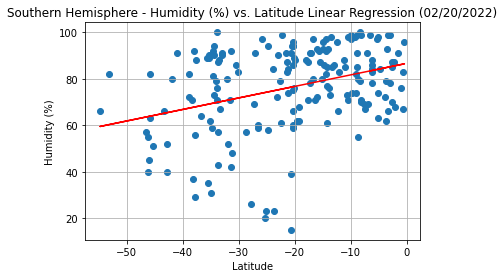

The r-value is 0.35066729333297.


In [62]:
# Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (02/20/2022)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Humidity"])

#LinReg and plot line 
test7_df = southern_df["Lat"]
test8_df = southern_df["Humidity"]

model = st.linregress(test7_df,test8_df)
y_values = test7_df*model[0]+model[1]
plt.plot(test7_df, y_values, color ='r')

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Save the figure
plt.savefig('SouthernHumidityPerLat.png')

# Show plot
plt.show()

#Determine R Value 
print(f"The r-value is {rvalue}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      100.003225
1       54.149625
2       76.516925
5       75.018125
8       62.641025
          ...    
540     40.916425
542     60.869925
543     96.148925
544     98.983425
545     82.464725
Name: Lat, Length: 358, dtype: float64
y = 0.65x +33.77
The r-value is 0.3232965048763185.


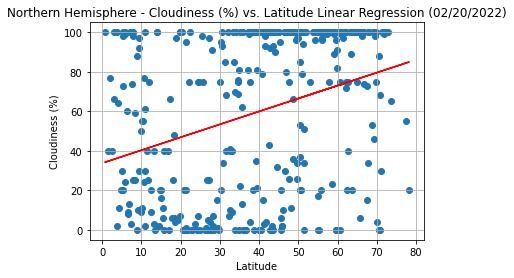

In [61]:
 # Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (02/20/2022)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#LinReg and plot line 
test9_df = northern_df["Lat"]
test10_df = northern_df["Cloudiness"]

model = st.linregress(test9_df,test10_df)
y_values = test9_df*model[0]+model[1]
plt.plot(test9_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Cloudiness"])

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#Determine R Value 
print(f"The r-value is {rvalue}.")

# Save the figure
plt.savefig('NorthernCloudinessPerLat.png')

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

3      67.151672
4      53.049672
6      71.368472
7      66.109872
9      66.730672
         ...    
521    73.245072
526    82.085072
527    69.755872
541    70.401672
546    80.934472
Name: Lat, Length: 182, dtype: float64
y = 1.36x +86.11
The r-value is 0.438170574544986.


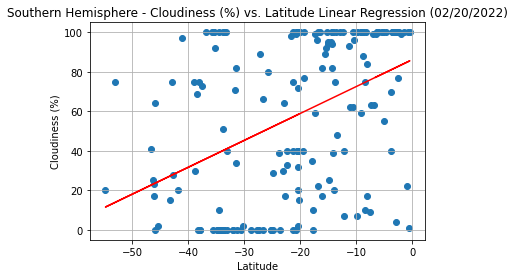

In [60]:
 # Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (02/20/2022)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



#LinReg and plot line 
test11_df = southern_df["Lat"]
test12_df = southern_df["Cloudiness"]

model = st.linregress(test11_df,test12_df)
y_values = test11_df*model[0]+model[1]
plt.plot(test11_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Cloudiness"])

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#Determine R Value 
print(f"The r-value is {rvalue}.")

# Save the figure
plt.savefig('SouthernCloudinessPerLat.png')

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      71.738009
1      25.884409
2      48.251709
5      46.752909
8      34.375809
         ...    
540    12.651209
542    32.604709
543    67.883709
544    70.718209
545    54.199509
Name: Lat, Length: 358, dtype: float64
y = 0.05x +6.11


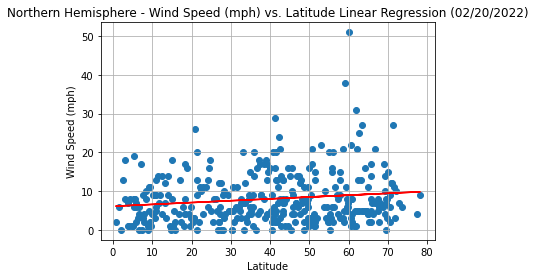

The r-value is 0.14530080079648722.


In [59]:
# Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (02/20/2022)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


#LinReg and plot line 
test13_df = northern_df["Lat"]
test14_df = northern_df["Wind Speed"]

model = st.linregress(test13_df,test14_df)
y_values = test13_df*model[0]+model[1]
plt.plot(test13_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Wind Speed"])

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Save the figure
plt.savefig('NothernWindSpeedPerLat.png')

# Show plot
plt.show()

#Determine R Value 
print(f"The r-value is {rvalue}.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

3     -16.086759
4     -30.188759
6     -11.869959
7     -17.128559
9     -16.507759
         ...    
521    -9.993359
526    -1.153359
527   -13.482559
541   -12.836759
546    -2.303959
Name: Lat, Length: 182, dtype: float64
y = -0.09x +4.32
The r-value is -0.2531524228691457.


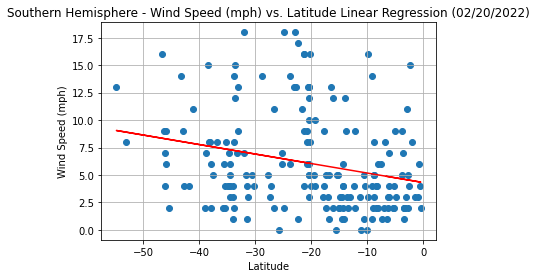

In [58]:
# Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (02/20/2022)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


#LinReg and plot line 
test15_df = southern_df["Lat"]
test16_df = southern_df["Wind Speed"]

model = st.linregress(test15_df,test16_df)
y_values = test15_df*model[0]+model[1]
plt.plot(test15_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Wind Speed"])

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#Determine R Value 
print(f"The r-value is {rvalue}.")

# Save the figure
plt.savefig('SouthernWindSpeedPerLat.png')

# Show plot
plt.show()